# EXPLORATORY DATA ANALYSIS WITH PYTHON, PANDAS, MATPLOTLIB AND SEABORN

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos después de la limpieza

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco_clean.csv`) con 45189 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services") 
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular") 
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Lectura del dataset

In [1]:
#import necesary library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
data = pd.read_csv("dataset_bank_clean.csv")

In [3]:
print(data.shape)
data.head()

(45189, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151.0,1,-1.0,0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92.0,1,-1.0,0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198.0,1,-1.0,0,unknown,no


#4. Exploratory analysis

The idea is to use statistical and visualization tools to:

- Create a mental map of the data set (understand it)
- Start finding answers to the question initially posed (what profile do the customers with the greatest conversion potential have?)

We will carry out these phases:

1. Analysis of each variable individually
2. Univariate analysis: relationship of each predictor variable with the variable to be predicted
3. Bivariate analysis: relationship of pairs of predictor variables with the variable to be predicted

##4.1 Analysis of each variable individually

It allows us to understand the general characteristics of each variable in our data set.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45189 entries, 0 to 45188
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45189 non-null  int64  
 1   job        45189 non-null  object 
 2   marital    45189 non-null  object 
 3   education  45189 non-null  object 
 4   default    45189 non-null  object 
 5   balance    45189 non-null  float64
 6   housing    45189 non-null  object 
 7   loan       45189 non-null  object 
 8   contact    45189 non-null  object 
 9   day        45189 non-null  int64  
 10  month      45189 non-null  object 
 11  duration   45189 non-null  float64
 12  campaign   45189 non-null  int64  
 13  pdays      45189 non-null  float64
 14  previous   45189 non-null  int64  
 15  poutcome   45189 non-null  object 
 16  y          45189 non-null  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 5.9+ MB


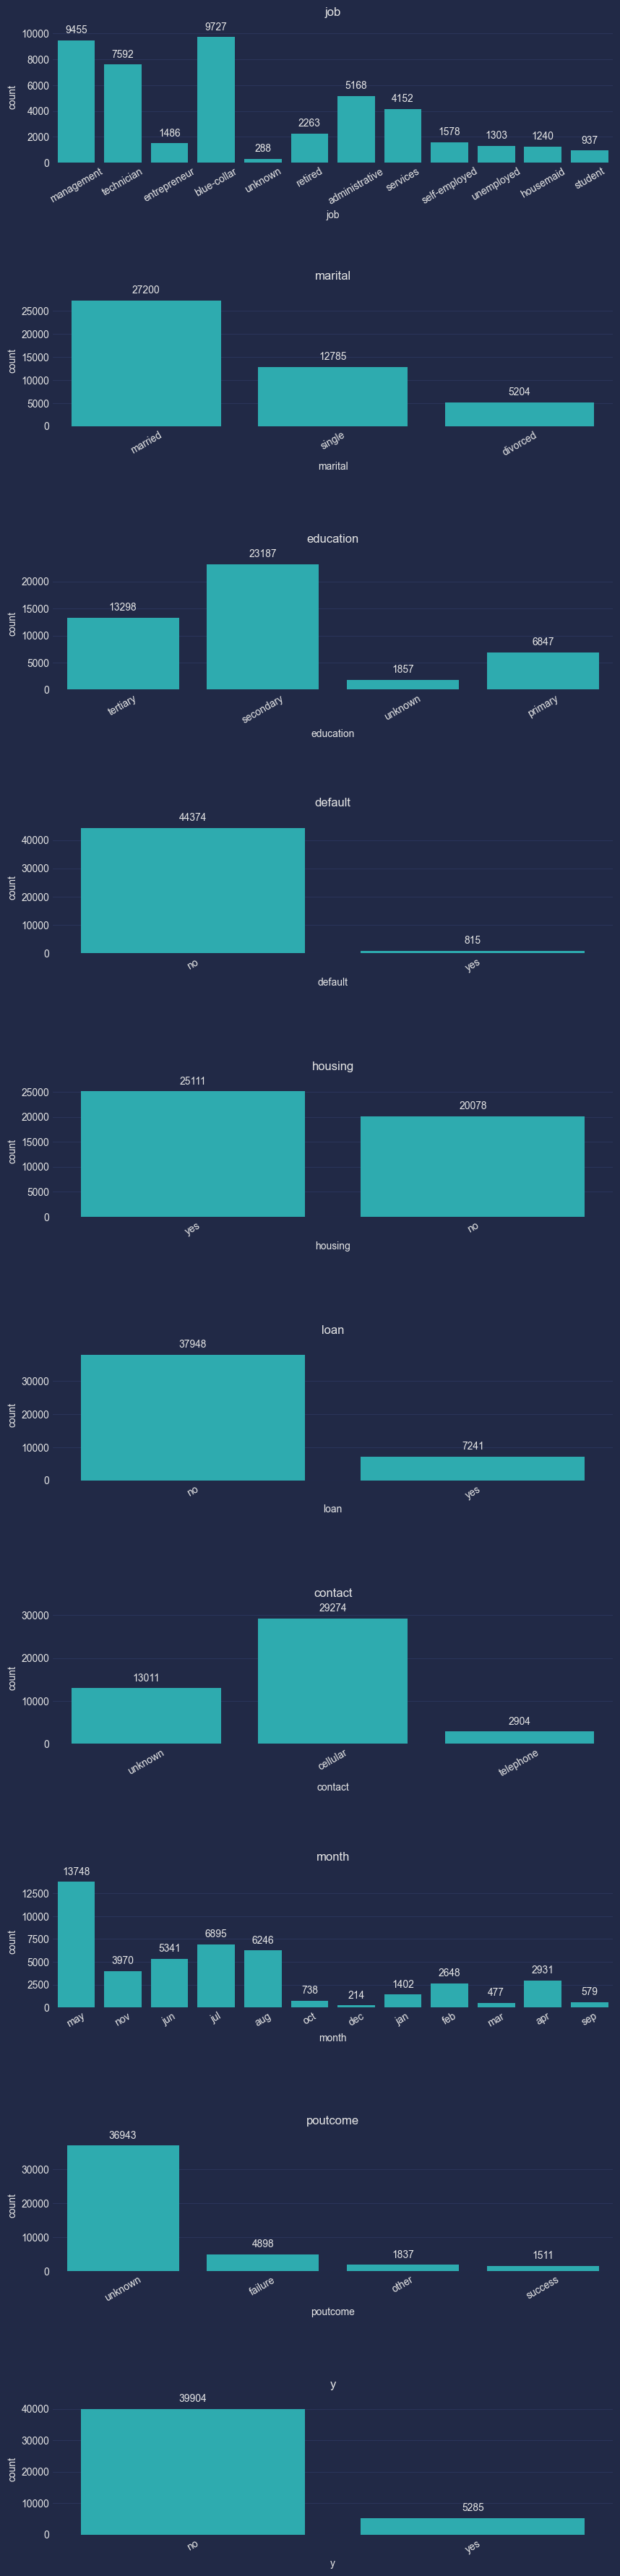

In [5]:
#take variables and show graphic bar

#style plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

col_cat = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'poutcome', 'y']

fig, ax = plt.subplots(nrows=len(col_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col, pad=15)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
  #number in columns
  for p in ax[i].patches:
      ax[i].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

**Observations:**

Levels of each variable of interest:
- 'work': 12
- 'marital': 3 (married, single, divorced)
- 'education': 4 (primary, secondary, tertiary, unknown)
- 'default': 2 (Yes, No). In this case, the vast majority of those contacted have 'No' values.
- 'housing': 2 (Yes, No). In this case the whole is relatively balanced.
- 'loan': 2 (Yes, No). In this case the vast majority contains 'No' values.
- 'poutcome': 4 (unknown, failure, other, success). The vast majority are at the 'unknown' level
- 'and': 2 (No, Yes). The vast majority are at the 'No' level. If a predictive model with Machine Learning is implemented later, this imbalance must be taken into account.

In [6]:
#eliminate columns "contact", "month", "day", "duration", "campaign","pdays" y "previous" because they do not provide information about the client
data.drop(columns=['contact','month', 'day', 'duration', 'campaign', 'pdays', 'previous'],inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'y'],
      dtype='object')

Veamos inicialmente el comportamiento de las variables numéricas ('age' y 'balance')

In [7]:
#data describe
data.describe()

,age,balance
count,45189.000000,45189.000000
mean,40.936445,1374.012149
std,10.618502,3924.370039
min,18.000000,-8019.000000
25%,33.000000,72.000000
50%,39.000000,448.000000
75%,48.000000,1428.000000
max,95.000000,527532.000000


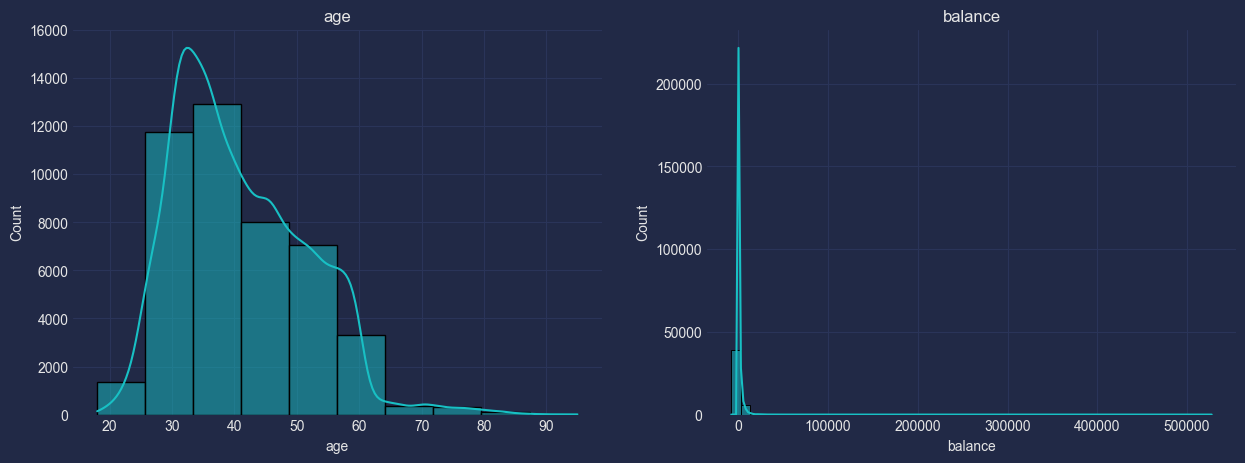

In [8]:
#histoplot of new data
col_num = ['age', 'balance']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'age':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

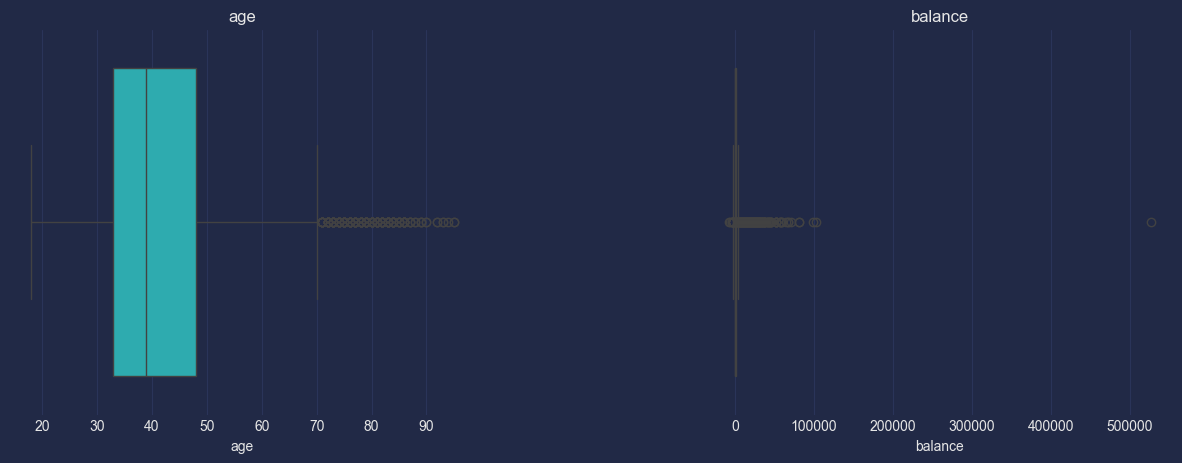

In [9]:
#graphic of differents columns
col_num = ['age', 'balance']

fig, ax = plt.subplots(nrows=1, ncols=len(col_num), figsize=(15,5))
fig.subplots_adjust(wspace=0.5)

for i, col in enumerate(col_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)


In [10]:
#show describe of balace column
data['balance'].describe()

count     45189.000000
mean       1374.012149
std        3924.370039
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      527532.000000
Name: balance, dtype: float64

**Observations:**

- Most of the contacted group is between 30 and 50 years old, with a bias towards 30-40 years old
- Most of the contacted group (75%) have negative balances or balances that do not exceed approximately 1,500 euros.

##4.2 Univariate analysis

Having clear some general characteristics of each individual data, the idea now is to analyze if there is any relationship between the possible predictor variables ('age', 'balance', 'job', 'marital', 'education', etc.) and the variable to predict ('y').

This is known as univariate analysis.

⚠️⚠️⚠️ WARNING ⚠️⚠️⚠️

This analysis will show us only one facet of the possible relationships between each predictor variable and the variable to be predicted, and it is not enough to draw conclusions.definitivas.

In [11]:
#create dictionary 'yes' = 1, 'no' = 0 for predict
dictionary = {'yes':1, 'no':0}
binary = data['y'].map(dictionary)
data['y_bin'] = binary
data.head()

,age,job,marital,education,default,balance,housing,loan,poutcome,y,y_bin
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,no,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,no,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,no,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,no,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,no,0


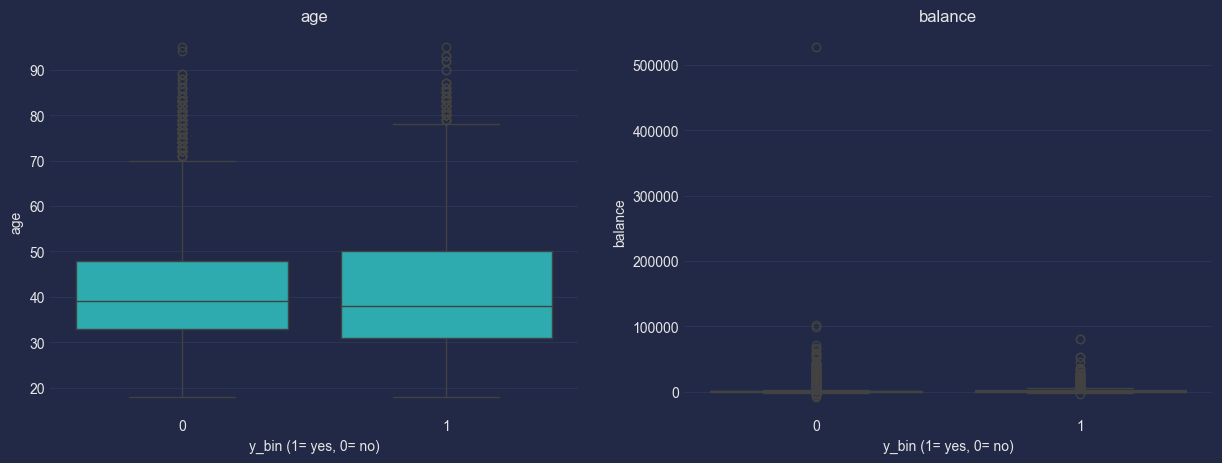

In [12]:
#analyze the relationship between numerical variables and the variable to be predicted ('y') y=mx+b
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.9)

for i, col in enumerate(col_num):
  bplt = sns.boxplot(x="y_bin", y=col, data=data, ax=ax[i])
  ax[i].set_xlabel('y_bin (1= yes, 0= no)')
  ax[i].set_title(col)

**Observations:**
- Neither in 'age' nor in 'balance' are there any differences between the people who purchased the product or not.
- It seems that numerical variables do not turn out to be predictive variables in principle.

However, these numerical variables are found in a wide range.

We can calculate conversion rates by defining intervals for these numerical variables and see if we can extract relevant information from that analysis:

In [13]:
#function for graphic conversion rates

def graph_conversion_rates(var_predictor, var_to_predict, type='line', order=None):
    x, y = var_predictor, var_to_predict

    #generate group (groupby), calculate conversion rate (mean), multiply it by 100 (mul(100))
    group = data.groupby(x)[y].mean().mul(100).rename('rate_conv').reset_index()

    #Y generate graphic
    if type=='line': #useful for continous range
        plt.figure(figsize=(10,6))
        sns.lineplot(x=var_predictor, y='rate_conv', data=group)
        plt.grid()
    elif type=='bar': # useful if data is divided into ranges or are categorical
        plt.figure(figsize=(14,6))
        ax = sns.barplot(x=var_predictor, y='rate_conv', data=group, order=order)
        plt.grid()
    
        for p in ax.patches:
            # text is the percentage value rounded to 2 decimal places
            text = f'{p.get_height():.2f}%'
            
            # position text at the center of each bar
            ax.text(p.get_x() + p.get_width() / 2, p.get_height(), text, ha='center', va='bottom')
    elif type=='scatter': #useful if data are div in range or are categorical
        plt.figure(figsize=(10,6)) 
        sns.scatterplot(x=var_predictor, y='rate_conv', data=group)
        plt.grid()

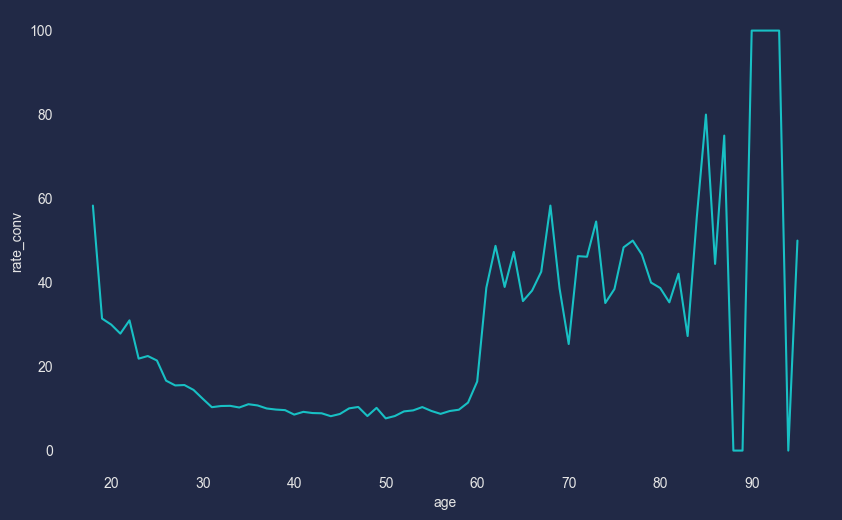

In [14]:
#Y graph conversion rates for the age variable
graph_conversion_rates('age','y_bin')

**Observations:**

- In this case there are differences in conversion rates by age
- We could establish three approximate ranges: 18-25 years, 26-59 years and 60 years and older

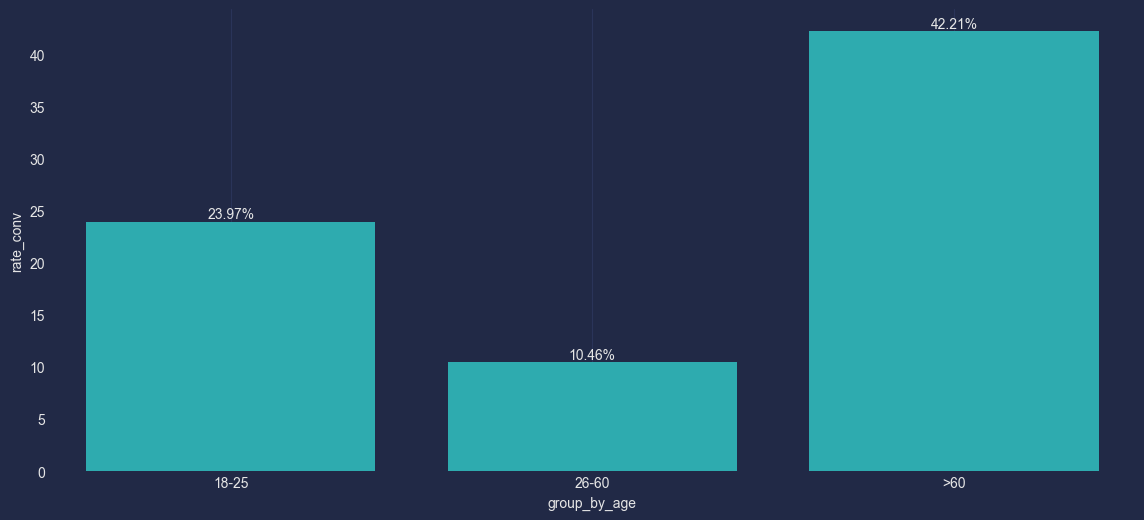

In [15]:
#let's create age subgroups and calculate conversion rates in each case

#new column in the data: "group_by_age"
data.loc[:,"group_by_age"] = "18-25"
data.loc[data["age"]>60,"group_by_age"] = ">60"
data.loc[(data["age"]>25)&(data["age"]<=60), "group_by_age"] = "26-60"

#graphic the conversion rate for this new column
graph_conversion_rates("group_by_age","y_bin",type="bar")

**Observations:**

- We have 3 quite distinct age ranges for which different conversion rates are achieved: 18-25 years (24%), 26-60 years (11%), over 60 years (43%)

In [16]:
#eliminate the column age leaving only the group by age
data.drop(columns=['age'], inplace=True)

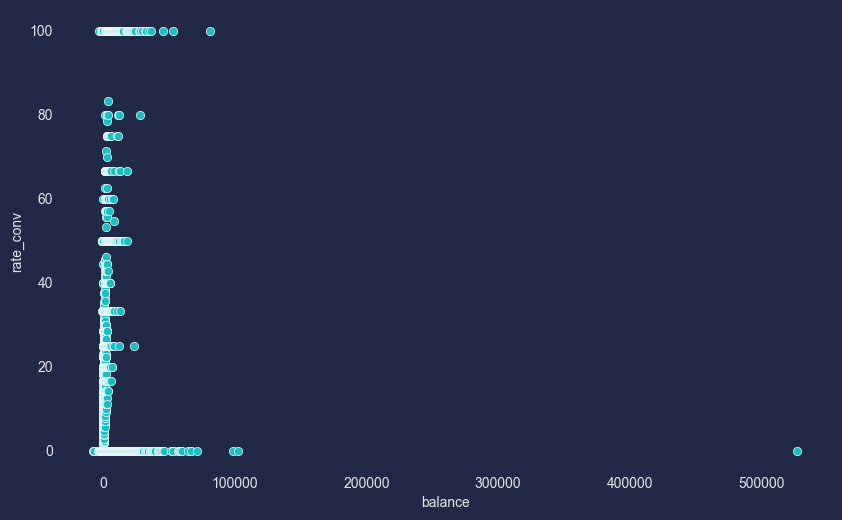

In [17]:
#graphic the conversion rate for column balace
graph_conversion_rates('balance','y_bin',type='scatter')

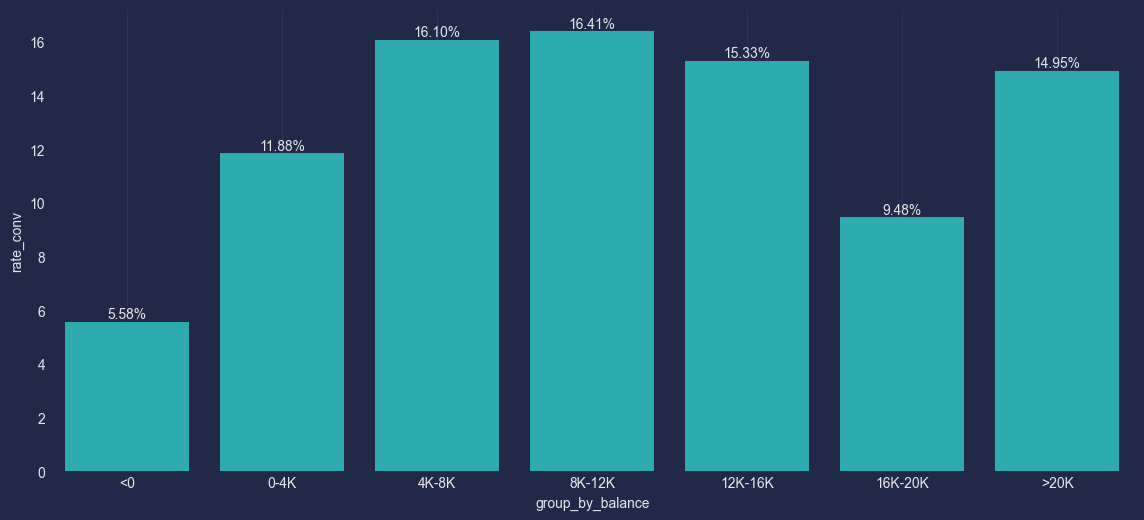

In [18]:
# It is not easy to see a pattern. As with age we generate different ranges, generate new column::
# <0
# 0-4000
# 4000-8000
# 8000-12000
# 12000-16000
# 16000-20000
# >20000

#new column named group_by_balace
data.loc[:,'group_by_balance'] = "<0"
data.loc[(data['balance']>=0) & (data['balance']<4000),'group_by_balance'] = "0-4K"
data.loc[(data['balance']>=4000) & (data['balance']<8000),'group_by_balance'] = "4K-8K"
data.loc[(data['balance']>=8000) & (data['balance']<12000),'group_by_balance'] = "8K-12K"
data.loc[(data['balance']>=12000) & (data['balance']<16000),'group_by_balance'] = "12K-16K"
data.loc[(data['balance']>=16000) & (data['balance']<20000),'group_by_balance'] = "16K-20K"
data.loc[data['balance']>=20000,'group_by_balance'] = ">20K"

#graphic the conversion rate for this column
order = ['<0', '0-4K', '4K-8K', '8K-12K', '12K-16K', '16K-20K', '>20K']
graph_conversion_rates('group_by_balance','y_bin',type='bar', order=order)

**Observations:**

- There seems to be a pattern. If we organize the bars in ascending order we observe:
    - <0: 6%
    - 0-4K: 12%
    - 4K-8K: 16%
    - 8K-12K: 16%
    - 12K-16K: 15%
    - 16K-20K: 9%
    - Greater than 20K: 15%

- Except for the 16K-20K range, in general a higher level of liquidity generates a higher conversion rate.
- We could define 4 ranges of interest to simplify the analysis:
  - 0-4K
  - 4K-16K
  - 16K-20K
  - Greater than 20K

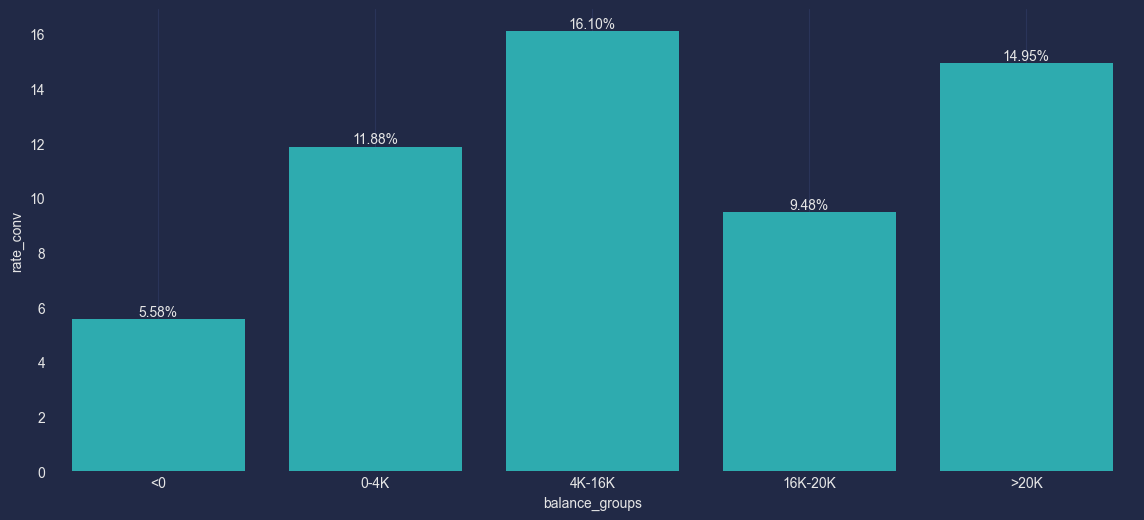

In [19]:
#generate the dataset only with this ranges and show result

#New column in the dataset: "balance_groups"
data.loc[:,"balance_groups"] = "<0"
data.loc[(data['balance']>=0) & (data['balance']<4000),"balance_groups"] = "0-4K"
data.loc[(data['balance']>=4000) & (data['balance']<16000),"balance_groups"] = "4K-16K"
data.loc[(data['balance']>=16000) & (data['balance']<20000),"balance_groups"] = "16K-20K"
data.loc[data['balance']>=20000,"balance_groups"] = ">20K"

#graphic the conversion rate for this column
order = ['<0','0-4K','4K-16K','16K-20K','>20K']
graph_conversion_rates('balance_groups','y_bin',type='bar', order=order)

In [20]:
#eliminate column "balance"
data.drop(columns=['balance'], inplace=True)

Now we will perform a similar analysis but for the categorical variables:

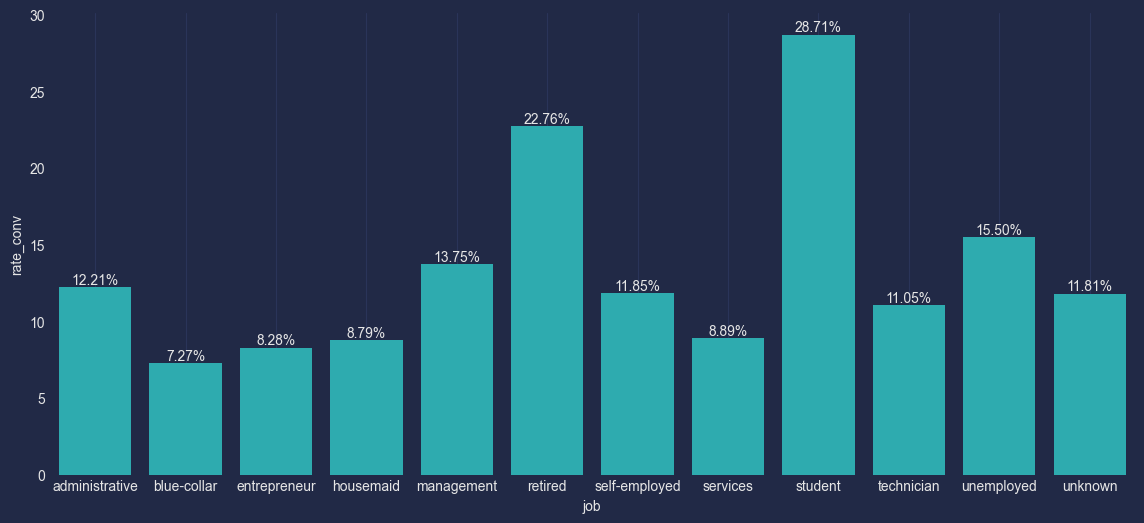

In [21]:
graph_conversion_rates('job', 'y_bin', type='bar')

**Observations:**

- Conversion rates range from approximately 8% to 28%
- "Retired" and "student" jobs have the highest conversion rates (23% and 28%)
- "Job" could be a predictor variable

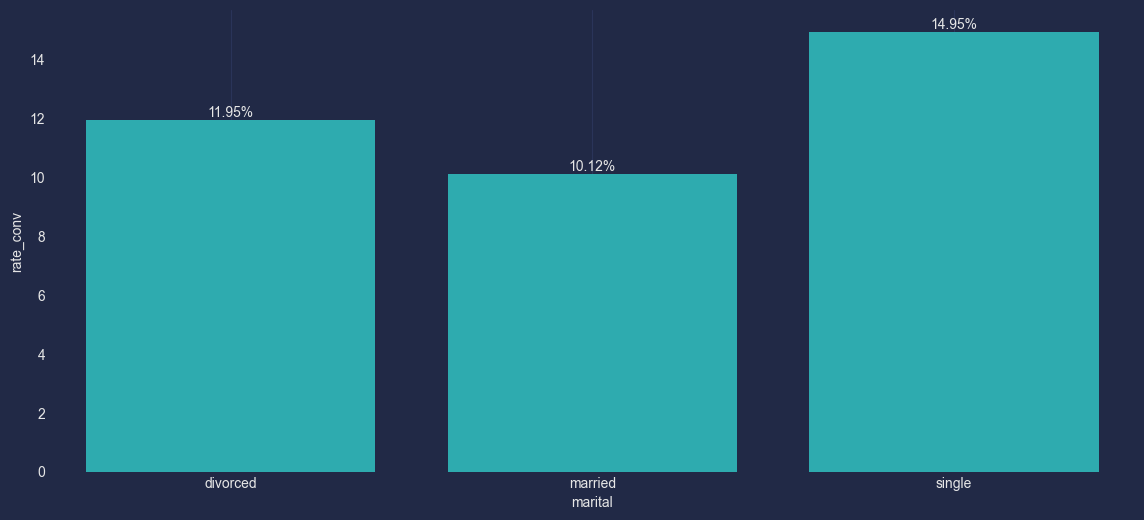

In [22]:
#graphic marital
graph_conversion_rates('marital','y_bin',type='bar')

**Observations:**

- Conversion rates are very similar for different levels in the "marital" variable
- "Marital" seems not to be a predictor variable

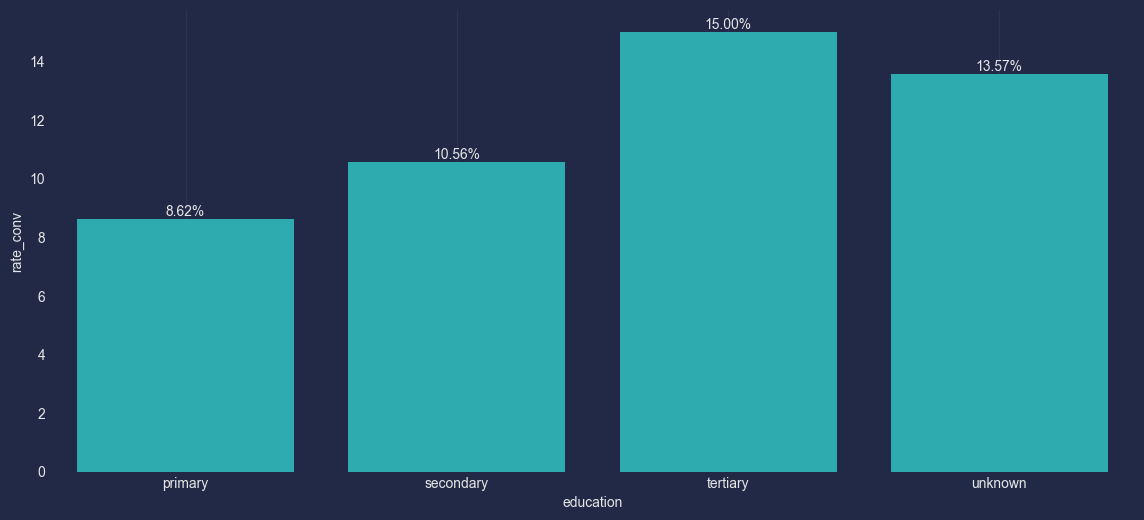

In [23]:
# education
graph_conversion_rates('education','y_bin',type='bar')

**Observations:**

- There is a slight increase in the conversion rate as the educational level increases.
- "Education" could be a predictor variable

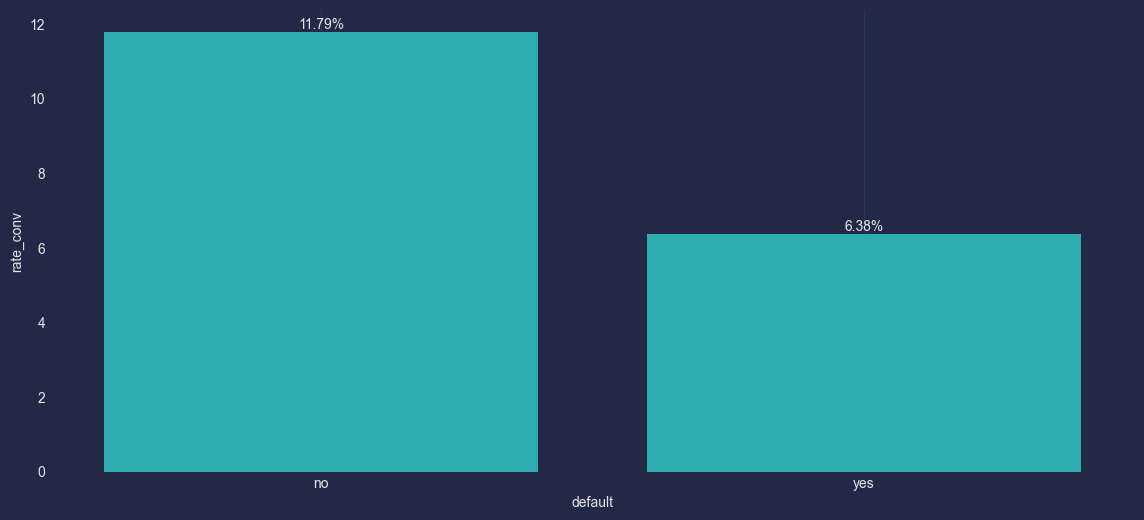

In [24]:
#graphic of desition yes or not
graph_conversion_rates('default','y_bin',type='bar')

**Observations**:

- The conversion rates for those who do not have a "default" are almost double those who do (12% vs. approximately 6%).
- "Default" could be a predictor variable

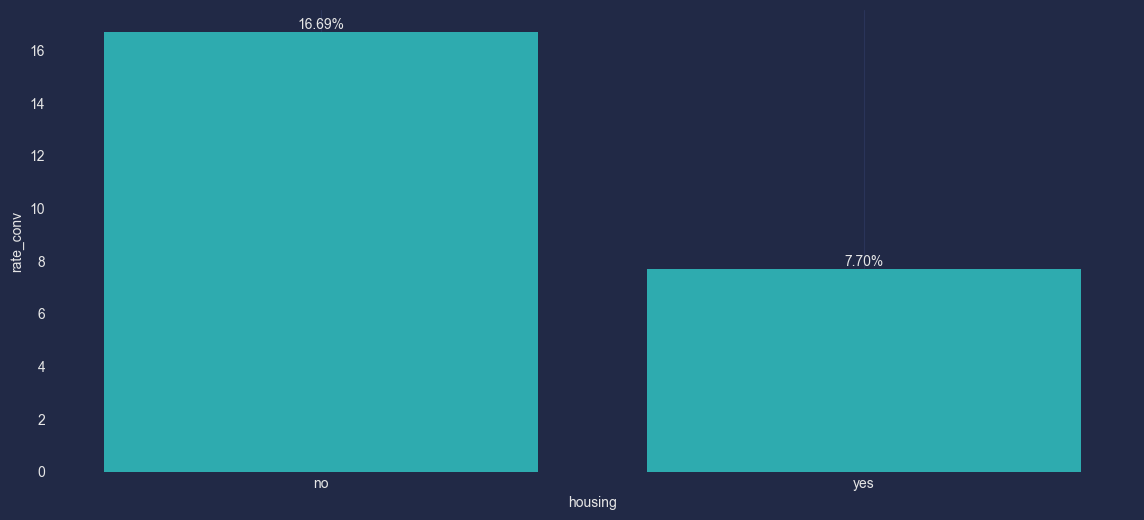

In [25]:
#graphic housing
graph_conversion_rates('housing','y_bin',type='bar')

**Observations:**

- Those who do not have a mortgage credit ("housing"=no) definitely have higher conversion rates.
- "Housing" is a predictor variable.

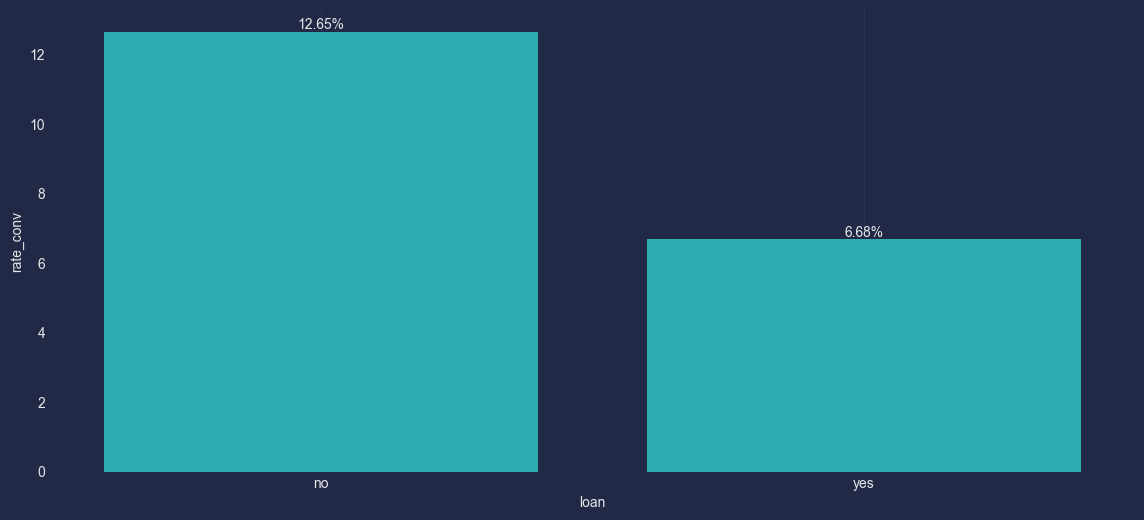

In [26]:
#graphic loan
graph_conversion_rates('loan','y_bin',type='bar')

**Observations:**

- With "loan" something similar happens to "housing": those who DO NOT have consumer loans definitely have higher conversion rates
- "Loan" is a predictor variable

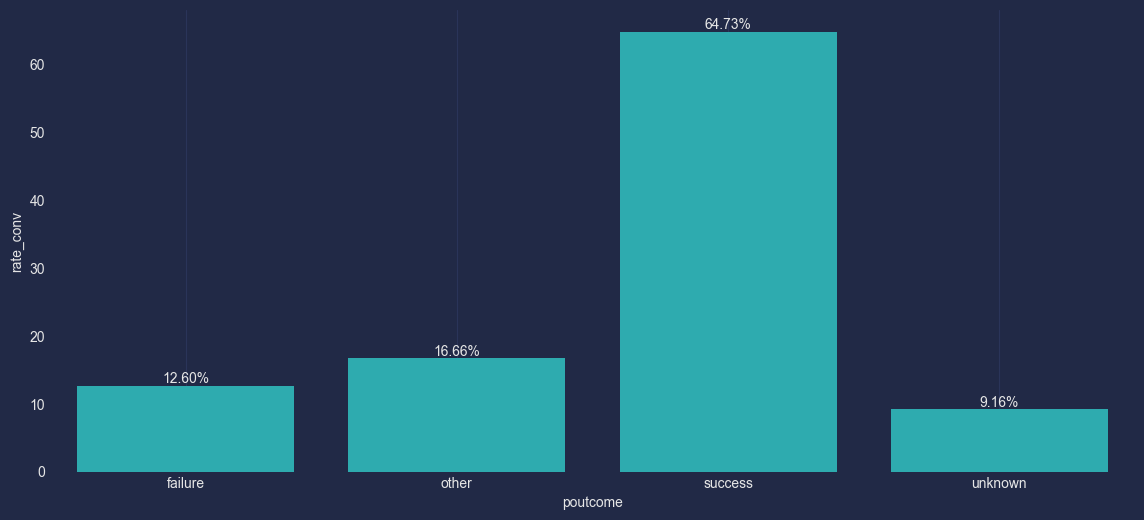

In [27]:
# poutcome
graph_conversion_rates('poutcome','y_bin',type='bar')

**Observations:**

- If the customer purchased a product in the previous campaign (poutcome = success) it is more likely that they will purchase this new product with the bank
- poutcome is definitely a predictor variable

### Summary

The predictor variables with the greatest impact on the conversion rate seem to be, in order of importance

1. poutcome: almost 70% conversion for the "success" level
2. job: with rates of 22% and 28% for 'retired' and 'student'
2. balance_groups and age_groups, with conversion rates close to 16% for various intervals
3. default, housing and loan with conversion rates between 12% and 16% for "no" levels
4. marital and education, with conversion levels comparable to default, housing and loan.

##4.3 Bivariate analysis

And we can go one step further in this exploratory analysis and analyze possible interactions between pairs of predictor variables and their impact on the variable to be predicted.

This is known as bivariate analysis.

As there are many possible combinations, we will analyze only the pairs with the greatest potential according to the order of importance defined in the summary of the univariate analysis.

The simplest way to do this analysis is through graphs (although more sophisticated statistical tools could also be used).

⚠️⚠️⚠️ WARNING ⚠️⚠️⚠️

Similar to what happens with univariate analysis, this analysis will show us only one facet of the possible relationships between pairs of predictor variables and the variable to be predicted, and it is not enough to draw definitive conclusions (although it will give us a more detailed clue in comparison with univariate analysis).

In [28]:
#Conversion rate for two columns
def graphic_bivariate(col_list, orden=None):
  tc = data.groupby(col_list)['y_bin'].mean().to_frame().reset_index()

  #graphic
  plt.figure(figsize=(13,7))
  ax = sns.pointplot(x=tc['y_bin'], y=tc[col_list[0]], hue=tc[col_list[1]], join=False, order=orden)
  ax.yaxis.grid(True)
  ax.xaxis.grid(True)
  plt.title(f'Conversion rate for {col_list[0]} and {col_list[1]}')
  plt.xlabel('Conversion rate for (%)')
  plt.xlim((0,1))

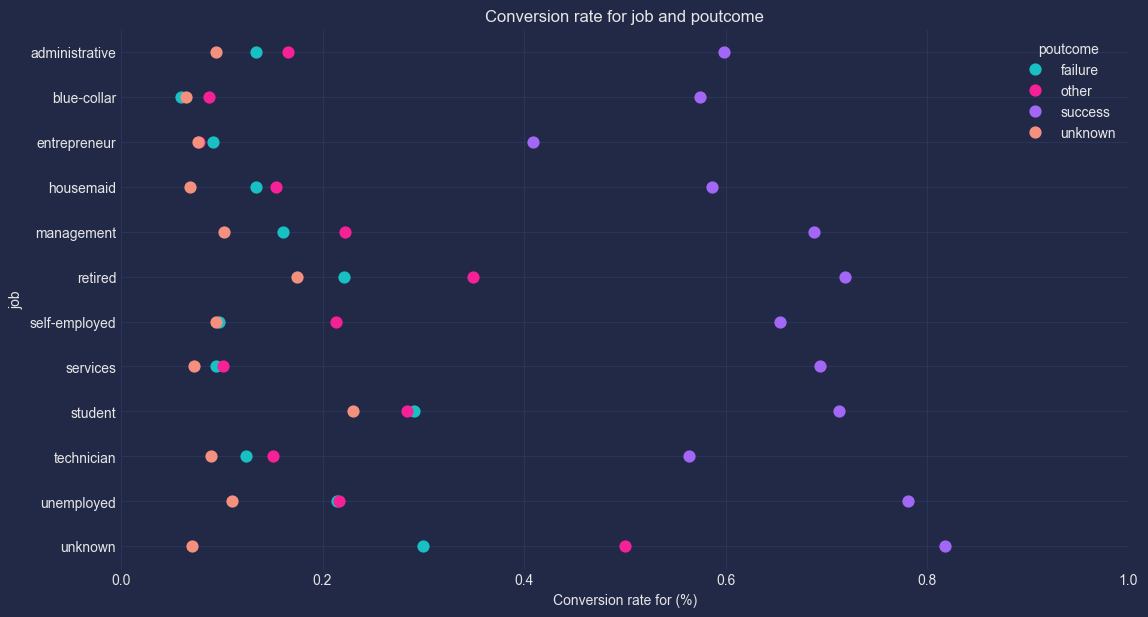

In [29]:
#for poutcome-job
graphic_bivariate(['job','poutcome'])

# Conversion rates over 60% with poutcome==success and
# job = unemployed (78%), student/retired (72%), services (70%),
# management (68%), self-employed (65%)

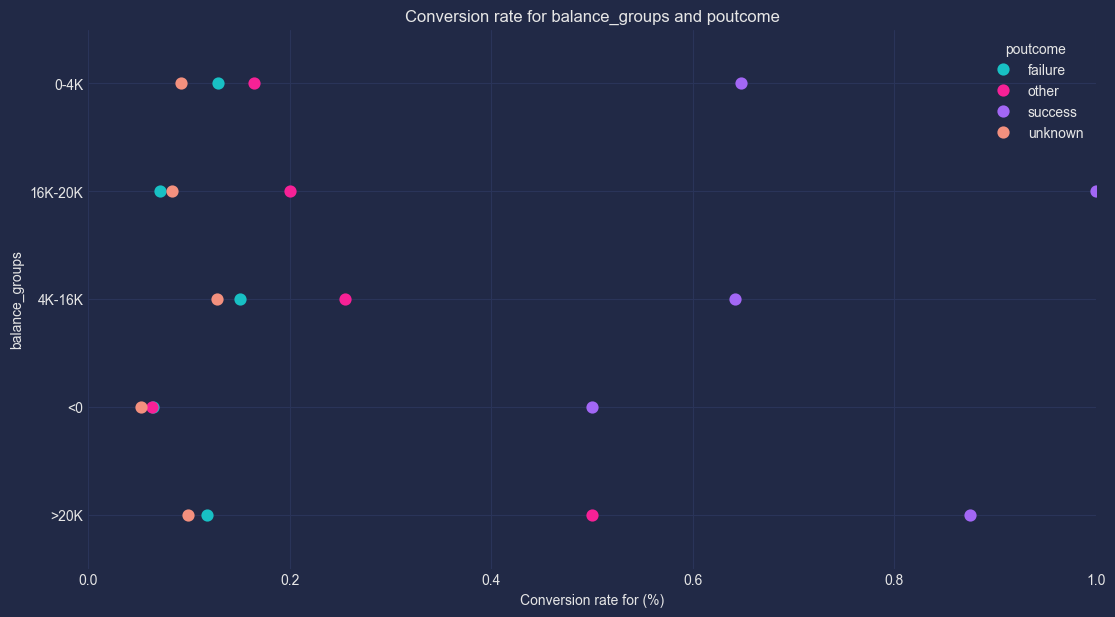

In [30]:
#graphic for poutcome-grupos_balance
graphic_bivariate(['balance_groups','poutcome'])

# Conversion rates above 60% for poutcome=success and
# - Income between 16K and 20K: 100%!!! It is interesting, because when analyzing only
# the income variable in this range produces the lowest conversion rates
# - Income over 20K: 88%
# - Income between 0-16K: 65%

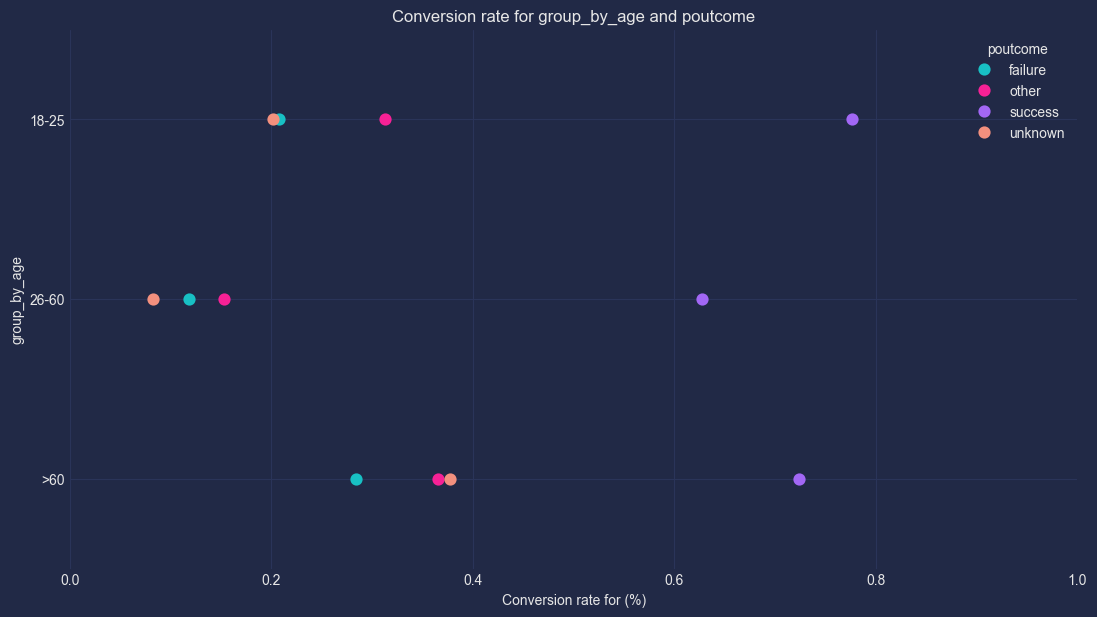

In [31]:
#graphic for poutcome-grupos_by_age
graphic_bivariate(['group_by_age','poutcome'])

# Conversion rates above 60% for poutcome=success and
# - Ages 18-25: 78%
# - Ages >60: 72%
# - Ages 26-60: 62%

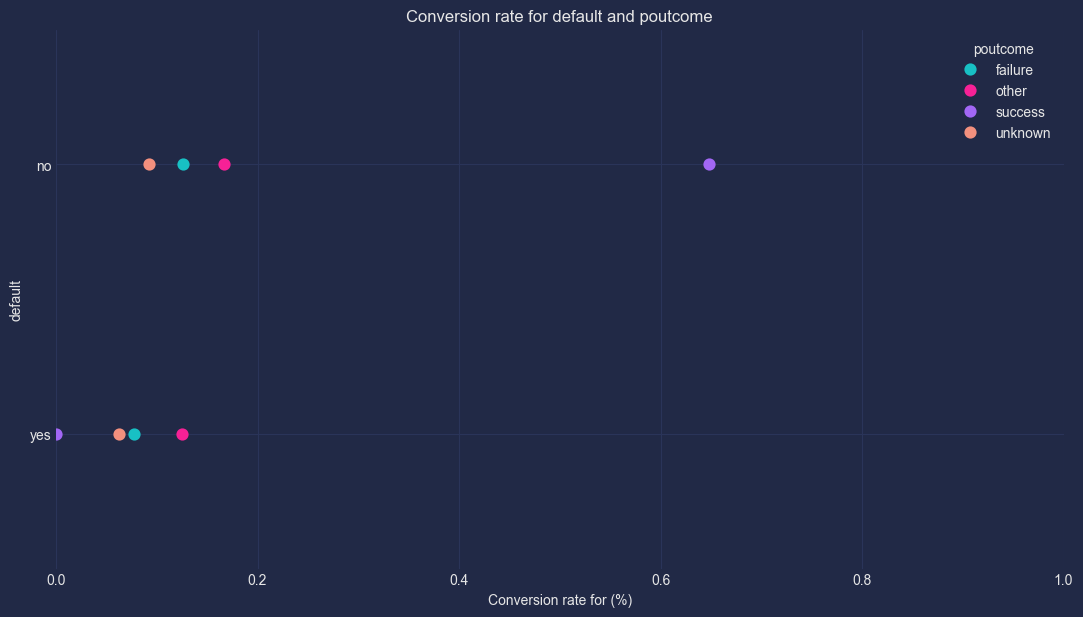

In [32]:
#Poutcome + default/housing/loan pairs
graphic_bivariate(['default','poutcome'])

# Conversion rates between 60 and 65% are achieved for
# the combinations poutcome=success and default/housing/loan=no

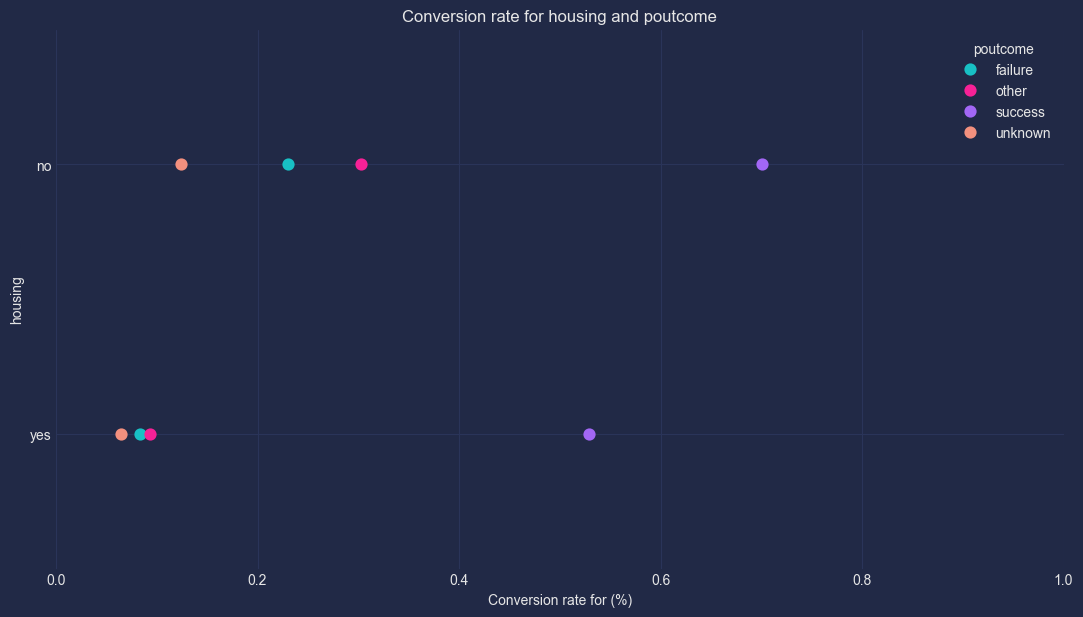

In [33]:
#Poutcome + default/housing/loan pairs
graphic_bivariate(['housing','poutcome'])

# Conversion rates between 60 and 65% are achieved for
# the combinations poutcome=success and default/housing/loan=no

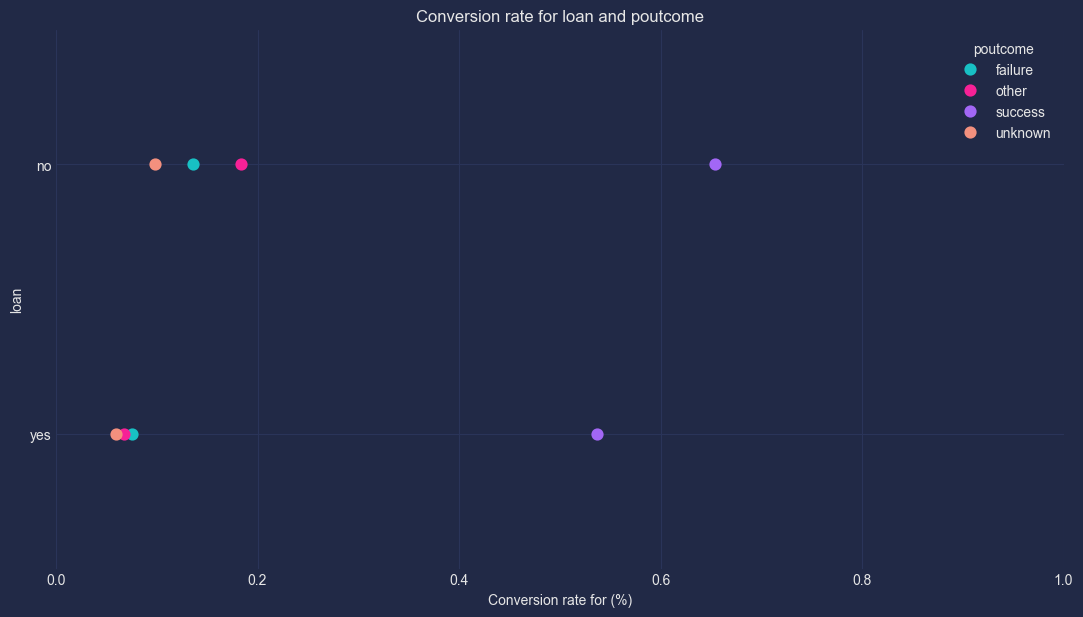

In [34]:
#Poutcome + default/housing/loan pairs
graphic_bivariate(['loan','poutcome'])

# Conversion rates between 60 and 65% are achieved for
# the combinations poutcome=success and default/housing/loan=no

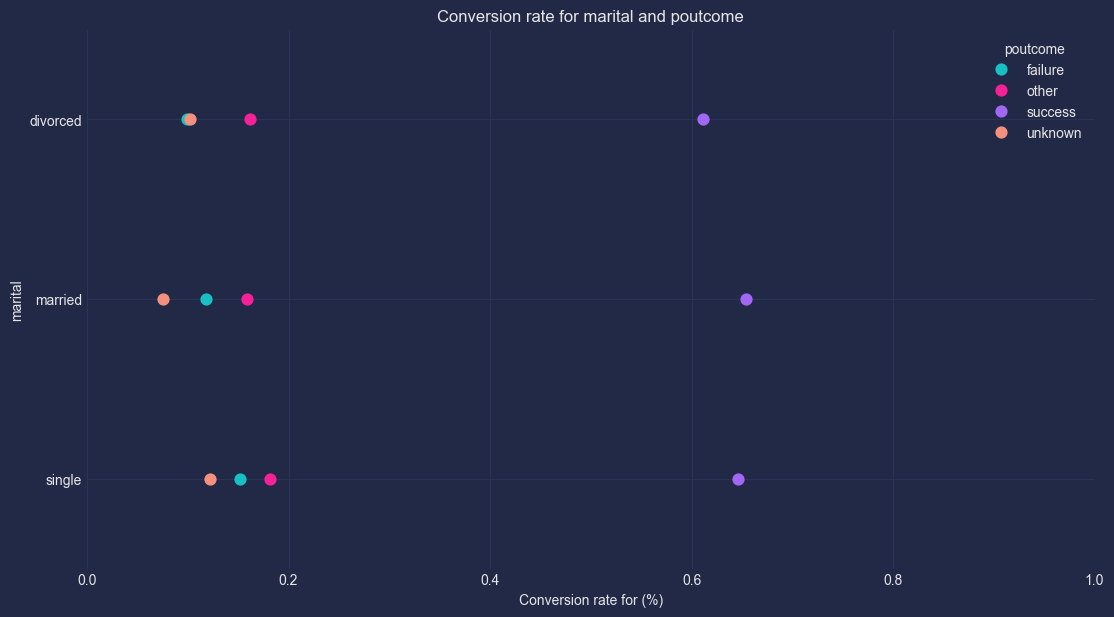

In [35]:
#poutcome + marital/education pairs
graphic_bivariate(['marital','poutcome'])

# - Conversion rates between 60 and 65% are achieved regardless of "marital"
# - And the same for "education"

# These variables are not so relevant

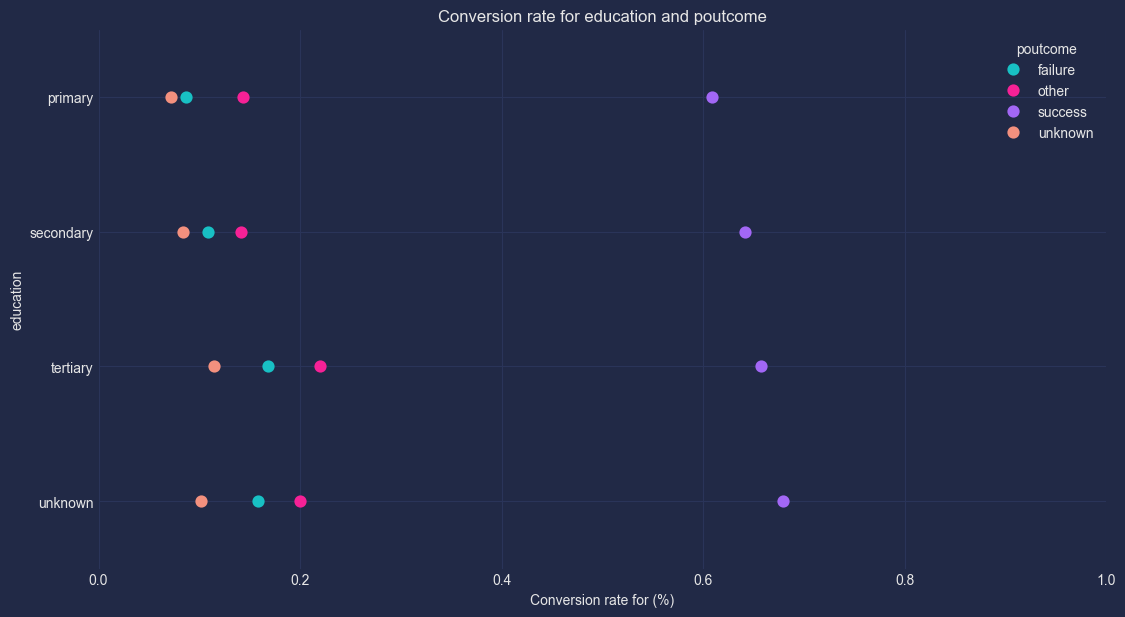

In [36]:
#poutcome + marital/education pairs
graphic_bivariate(['education','poutcome'])

# - Conversion rates between 60 and 65% are achieved regardless of "marital"
# - And the same for "education"

# These variables are not so relevant

# Conclusions

- The variable "poutcome" followed by the variables "job", "groups_balance" and "groups_age" are the ones that have the greatest impact on the conversion rate.
- With this analysis the ideal client profile would be:
    - You must have been previously contacted by the bank and must have previously purchased said product (*poutcome == success*)
    - Labor profile (top-3): unemployed, student, retired
    - Balance in your bank account: between 16K and 20K (preferred)
    - Age: between 18 and 25 years (preferably)
    - That DOES NOT have consumer credit, mortgage credit or that has not entered "default"


It is possible that the combination of more than two variables (multivariate analysis) will shed more light on these profiles. But in this case the interpretation of the results becomes difficult as we analyze more and more variables simultaneously.

At this point the step to follow would be to use a Machine Learning model that allows us to find those patterns that are not easy to see with this exploratory analysis.